In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from seaborn import pairplot

In [32]:
# Read the dataset
df = pd.read_csv('BC-Data-Set.csv', sep=';')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                                date           BC        N_CPC        PM-10  \
count                           4223  4223.000000  4223.000000  4223.000000   
mean   2019-06-08 17:44:58.934406912     1.309454    13.651880    15.132366   
min              2019-01-01 00:00:00     0.110000     1.376000     0.600000   
25%              2019-02-24 23:30:00     0.658500     7.725500     8.550000   
50%              2019-06-02 11:00:00     0.971000    11.547000    12.883000   
75%              2019-09-22 03:30:00     1.513000    17.505500    18.467000   
max              2019-12-10 23:00:00    12.767000    73.490000   398.717000   
std                              NaN     1.122286     8.236568    14.254218   

            PM-2.5       PM-1.0          NO2           O3          SO2  \
count  4223.000000  4223.000000  4223.000000  4223.000000  4223.000000   
mean      9.302461     7.259924    30.032402    48.139158     1.368459   
min       0.500000     0.333000     2.000000  

Kind of a spoiler, but we can already see the correlation between BC and the rest of factors.

In [33]:
# Correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix["BC"])


Correlation Matrix:
date     -0.023827
BC        1.000000
N_CPC     0.514739
PM-10     0.331862
PM-2.5    0.504558
PM-1.0    0.496120
NO2       0.493987
O3       -0.352667
SO2       0.057469
CO        0.260429
NO        0.365809
NOX       0.466400
TEMP     -0.016964
HUM       0.129768
Name: BC, dtype: float64


In [34]:
# Create a copy of the 'date' column
date_column = df['date'].copy()

# normalize all columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# This will remove the date column from the dataframe
df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

In [35]:
df.columns

Index(['date', 'BC', 'N_CPC', 'PM-10', 'PM-2.5', 'PM-1.0', 'NO2', 'O3', 'SO2',
       'CO', 'NO', 'NOX', 'TEMP', 'HUM'],
      dtype='object')

From `seaborn` we can use the `pairplot` function to get some R-like plots 

# Plot scatter plots for all pairs of variables
plt.figure()
pairplot(df)
plt.title('Scatter Plots')
plt.show()

# Plot temporal trends for selected variables
plt.figure()
columns_to_plot = ['BC', 'N_CPC', 'PM-10', 'PM-1.0', 'NO2', 'O3', 'SO2', 'CO', 'NO', 'NOX', 'TEMP', 'HUM']
for column in columns_to_plot:
    plt.plot(df['date'], df[column], label=column, linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('Temporal Trends')
plt.legend()
plt.show()

Shuffle the data into train and test sets

In [36]:
from sklearn.model_selection import train_test_split

features = ['N_CPC', 'PM-10', 'PM-1.0', 'NO2', 'O3', 'SO2', 'CO', 'NO', 'NOX', 'TEMP', 'HUM']
target = 'BC'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=52)

A linear regression model is bound to not be very good, but we still do it for illustration porpouses.

In [37]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
pred_linreg = model.predict(X_test)

# Calculate R^2
r2 = r2_score(y_test, pred_linreg)
print(f'R^2: {r2}')

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, pred_linreg))
print(f'RMSE: {rmse}')

R^2: 0.5424684536944936
RMSE: 0.6864501547334452


## Support Vector Regression model

In [38]:
from sklearn.svm import SVR
# SVR with 'rbf' kernel works best
model = SVR(kernel='rbf')

# Train the model
model.fit(X_train, y_train)

# Generate predictions for the test set
pred_svr = model.predict(X_test)

# Calculate R^2
r2 = r2_score(y_test, pred_svr)
print(f'R^2: {r2}')

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, pred_svr))
print(f'RMSE: {rmse}')


R^2: 0.6530194892806656
RMSE: 0.5977932769080972


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Generate predictions for the test set
pred_rf = model.predict(X_test)

# Calculate R^2
r2 = r2_score(y_test, pred_rf)
print(f'R^2: {r2}')

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, pred_rf))
print(f'RMSE: {rmse}')

R^2: 0.7258079457785879
RMSE: 0.5314053447191042


## Feed-Forward Neural Network

In [ ]:
import torch
from torch import nn
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Define the model
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

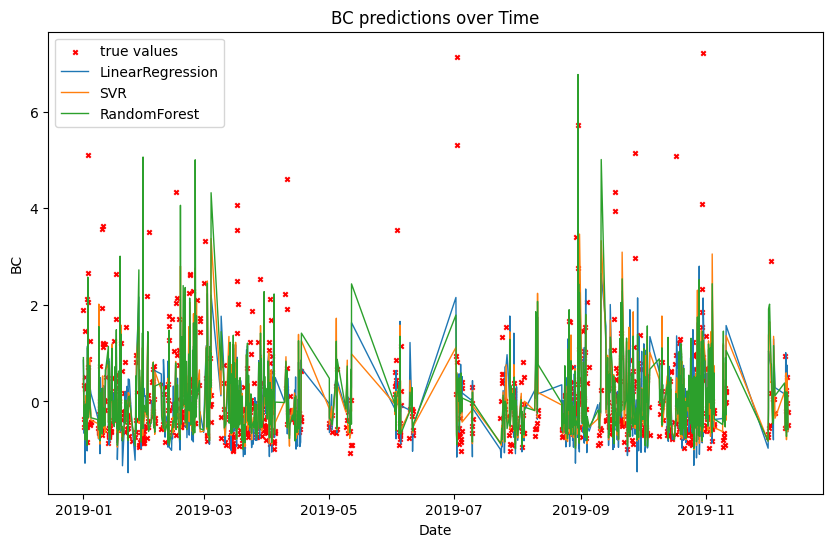

In [40]:
# Sort the data by the index
y_train = y_train.sort_index()
y_test = y_test.sort_index()

# Get the dates corresponding to the sorted training and testing sets
train_dates = date_column[y_train.index]
test_dates = date_column[y_test.index]

# Scatter plot the 'BC' values for the sorted training data
plt.figure(figsize=(10, 6))
plt.scatter(test_dates, y_test, label='true values', 
            color ='red', s=10 , marker='x' )

# Scatter plot the 'BC' values for the sorted testing data
plt.plot(test_dates, pred_linreg, label='LinearRegression', linewidth=1)
plt.plot(test_dates, pred_svr, label='SVR', linewidth=1)
plt.plot(test_dates, pred_rf, label='RandomForest', linewidth=1)


plt.xlabel('Date')
plt.ylabel('BC')
plt.title('BC predictions over Time')
plt.legend()

plt.show()